Sampling Rate: 512 Hz
Channels: 11 -> ['C3', 'C4', 'Ref_Nose', 'FC3', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CP4']
Samples: 317825
Estimated Duration: 620.75 seconds (~10.35 minutes)


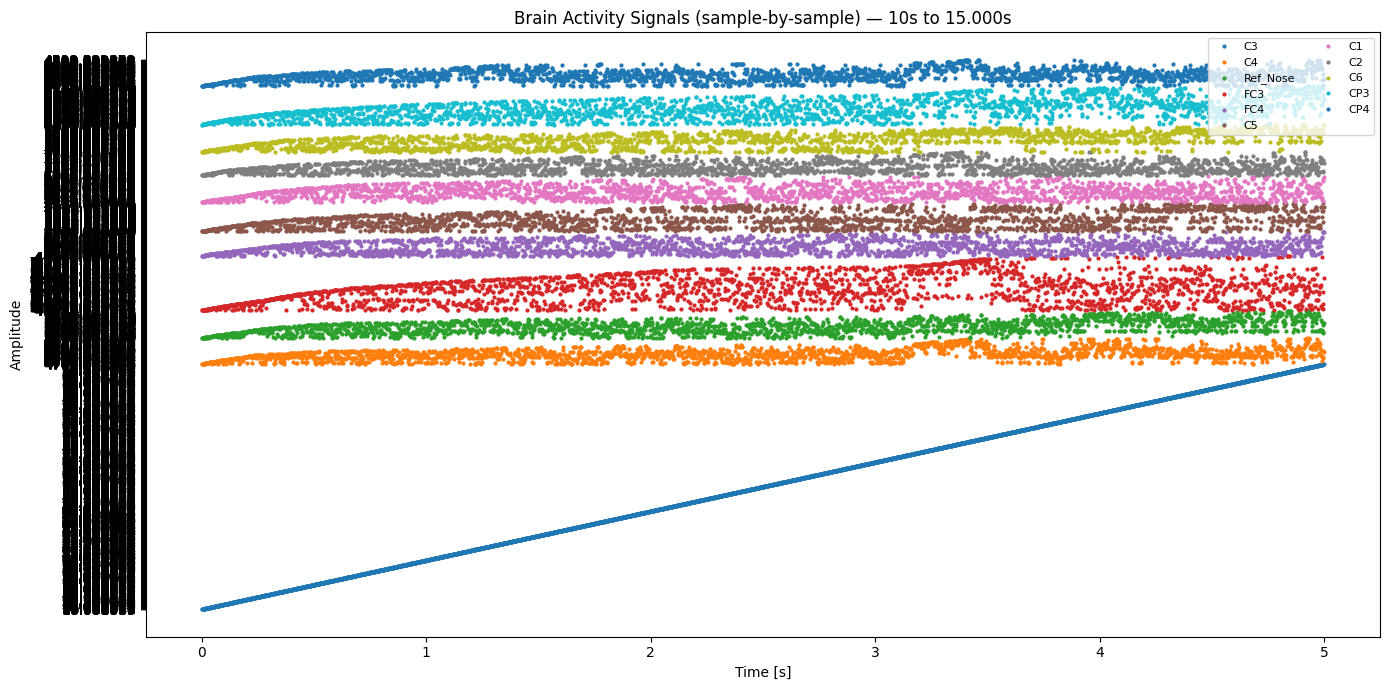

In [4]:
# %% [markdown]
# # Brain Activity Recording Analysis
# This notebook loads brain activity signal and spectrum data, estimates the duration of the recording,
# and displays graphs over a smaller interval, plotting *all channels* sample-by-sample.

# %%
# Imports & metadata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Manually set metadata from OpenViBE CSV header
SAMPLING_RATE = 512  # Hz

# Channel list from your header (last one is not a signal channel)
CHANNEL_NAMES = ['C3','C4','Ref_Nose','FC3','FC4','C5','C1','C2','C6','CP3','CP4','Sampling Rate']
DATA_CHANNEL_NAMES = [ch for ch in CHANNEL_NAMES if ch != 'Sampling Rate']  # only EEG channels
CHANNEL_COUNT = len(DATA_CHANNEL_NAMES)

# %%
# Load signal data (OpenViBE CSV: skip 4 metadata lines, semicolon-separated, no header row for data)
# We assign column names explicitly based on your list above.
signal_df_raw = pd.read_csv(
    '../input/brain-activity-records/01-signal_d.csv',
    sep=';',
    skiprows=4,
    header=None,
    engine='python'
)

# Ensure we have at least as many columns as our expected names
if signal_df_raw.shape[1] < len(CHANNEL_NAMES):
    raise ValueError(
        f"CSV has {signal_df_raw.shape[1]} columns but {len(CHANNEL_NAMES)} were expected."
    )

signal_df_raw = signal_df_raw.iloc[:, :len(CHANNEL_NAMES)]
signal_df_raw.columns = CHANNEL_NAMES

# Keep only the actual EEG channels (drop the 'Sampling Rate' column if present)
signal_df = signal_df_raw[DATA_CHANNEL_NAMES].copy()

# Peek at the data
signal_df.head()

# %%
# Sampling rate & duration info
num_samples = len(signal_df)
duration_sec = num_samples / SAMPLING_RATE

print(f"Sampling Rate: {SAMPLING_RATE} Hz")
print(f"Channels: {CHANNEL_COUNT} -> {DATA_CHANNEL_NAMES}")
print(f"Samples: {num_samples}")
print(f"Estimated Duration: {duration_sec:.2f} seconds (~{duration_sec/60:.2f} minutes)")

# %%
# Plot ALL channels over a smaller interval, sample-by-sample (discrete points)

# ---- Configure your viewing window here ----
start_time_s   = 10          # start at 10 seconds (change as needed)
window_seconds = 5           # show 5 seconds (change as needed)
# --------------------------------------------

# Convert times to sample indices with bounds checking
start_idx = int(max(0, min(num_samples, start_time_s * SAMPLING_RATE)))
end_idx   = int(max(start_idx, min(num_samples, start_idx + window_seconds * SAMPLING_RATE)))

interval_df = signal_df.iloc[start_idx:end_idx].reset_index(drop=True)

# Time axis in seconds, aligned to window start
time_axis = np.arange(len(interval_df)) / SAMPLING_RATE

# Plot discrete points for each channel
plt.figure(figsize=(14, 7))
for ch in DATA_CHANNEL_NAMES:
    plt.plot(time_axis, interval_df[ch], marker='o', linestyle='None', markersize=2, label=ch)

plt.title(f"Brain Activity Signals (sample-by-sample) — {start_time_s}s to {start_time_s + (end_idx-start_idx)/SAMPLING_RATE:.3f}s")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend(loc="upper right", ncol=2, fontsize=8)
plt.tight_layout()
plt.show()



In [ ]:
# %%
# Load Spectrum Data
spectrum_df = pd.read_csv('../input/brain-activity-records/01-spectrum_d.csv')
spectrum_df.head()

# %%
# Plot Spectrum Data
plt.figure(figsize=(12, 4))
plt.plot(spectrum_df.iloc[:, 0], spectrum_df.iloc[:, 1])
plt.title('Brain Activity Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

